In [1]:
# 增加一年最大跌幅，研究std<30,peg>0.3、股票波谷
# to research peg max, hs300_df跌幅
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from importlib import reload
import MyStock as ms
import tushare as ts

reload(ms)

<module 'MyStock' from 'D:\\zzz\\Anaconda_code\\MyStock.py'>

In [81]:
self = ms.MyStock(2015)
self.watch()

D:\zzz\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\zzz\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [84]:
print(self.stockGDF.columns)

Index(['Unnamed: 00', 'SECUCODE', 'SECUNAME0', 'EPSJB0', 'EPSKCJB0', 'YS0',
       'YSTZ0', 'YSHZ0', 'SJL0', 'SJLTZ0',
       ...
       'SJLTZ', 'pe_report_date', 'eps_ondate', 'peg_report_date',
       'price_report_date', '1y最大涨幅', '1y最大跌幅', 'hs300_zf', 'pe', 'peg'],
      dtype='object', length=108)


In [73]:
df = self.stockGDF[[ 'hs300_zf', 'pe_report_date', 'peg_report_date'] + ['SJLTZ'+str(i) for i in range(5)]\
                 + ['1y最大涨幅', '1y最大跌幅']][(self.stockGDF.peg_report_date > 0) & (self.stockGDF.peg_report_date<1)]

In [38]:
df.head()

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅,1y最大跌幅
13,18.32,26.44,0.88,-6.567186,44.742251,26.356196,33.029388,30.120222,17.21,-2.71
85,10.78,17.47,0.55,96.168767,34.165558,27.651527,51.533277,31.528854,4.51,-19.84
538,10.37,30.03,0.58,49.070070,40.806892,44.284566,43.511025,52.132487,61.16,-2.61
703,12.80,31.98,0.28,201.178463,34.721039,47.791164,86.657787,115.201936,5.54,-20.03
855,10.37,6.51,0.05,-85.416097,38.740086,591.934670,618.048487,138.566523,30.80,-6.08


In [74]:
df['std'] = np.std(df[['SJLTZ'+str(i) for i in range(5)]], axis=1)

In [50]:
df

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅,1y最大跌幅,std
13,18.32,26.44,0.88,-6.567186,44.742251,26.356196,33.029388,30.120222,17.21,-2.71,17.189144
85,10.78,17.47,0.55,96.168767,34.165558,27.651527,51.533277,31.528854,4.51,-19.84,25.334740
538,10.37,30.03,0.58,49.070070,40.806892,44.284566,43.511025,52.132487,61.16,-2.61,4.077529
703,12.80,31.98,0.28,201.178463,34.721039,47.791164,86.657787,115.201936,5.54,-20.03,59.315330
855,10.37,6.51,0.05,-85.416097,38.740086,591.934670,618.048487,138.566523,30.80,-6.08,290.307754
1240,9.21,35.03,0.94,42.043779,45.374804,42.878296,36.452929,37.284828,15.59,-8.15,3.407297
1442,14.11,7.51,0.14,-91.421104,114.583034,368.697535,223.556563,55.484798,17.63,-4.43,155.215642
1578,9.42,33.81,0.71,27.153696,46.149056,76.898624,58.949229,47.848912,11.85,-9.13,16.341582
1827,10.84,19.73,0.59,-65.428978,34.962352,34.171775,29.614197,33.509564,45.96,-7.04,39.440330
1942,10.52,50.84,0.49,-1.484881,42.971722,89.588022,128.551029,103.996514,35.26,-23.29,46.413745


In [51]:
df.describe()

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅,1y最大跌幅,std
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,12.970500,29.017000,0.556500,32.902348,109.955493,182.918312,101.147721,63.614054,35.173000,-10.817500,82.196232
std,4.425683,12.690746,0.273501,86.083333,158.437029,288.766205,134.721610,35.108932,40.481393,10.919447,109.672379
min,8.830000,6.510000,0.050000,-96.212269,32.900252,26.356196,25.168759,30.120222,0.000000,-39.380000,3.407297
25%,10.370000,19.052500,0.295000,-21.282634,39.079864,32.006926,35.597044,37.265207,10.272500,-19.887500,16.977253
50%,10.840000,31.005000,0.585000,42.498167,45.314786,43.812708,51.872765,50.779733,25.000000,-7.135000,34.425596
75%,13.127500,36.710000,0.725000,79.732746,90.057581,126.851077,97.131098,78.306310,37.935000,-2.685000,73.527143
max,23.890000,50.840000,0.940000,201.178463,680.010705,1103.884496,618.048487,138.566523,153.620000,0.000000,395.148966


In [76]:
df[(df['std']<30) & (df['peg_report_date'] > 0.3)].describe()

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅,1y最大跌幅,std
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,12.618889,32.226667,0.750000,52.875865,48.402335,47.592101,47.024937,43.297895,36.458889,-8.935556,16.139336
std,5.097250,8.664743,0.140535,35.880895,20.441222,23.231151,17.632070,10.596722,40.698430,9.015627,9.802721
min,8.830000,17.470000,0.550000,-6.567186,32.900252,26.356196,26.062601,30.120222,2.040000,-25.700000,3.407297
25%,9.420000,26.550000,0.690000,27.153696,39.193124,29.695921,36.452929,37.206343,11.850000,-12.280000,8.702286
50%,10.780000,33.810000,0.710000,49.070070,44.742251,42.878296,43.511025,41.817493,17.210000,-8.150000,16.341582
75%,11.910000,35.030000,0.880000,74.254073,46.149056,44.284566,51.533277,48.950641,60.220000,-2.610000,25.334740
max,23.890000,48.420000,0.940000,104.979034,100.540733,94.639287,86.304628,62.791276,128.000000,0.000000,29.410862


In [75]:
df[(df['std']<20) & (df['peg_report_date'] > 0.3)].describe()

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅,1y最大跌幅,std
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,11.678333,30.980000,0.751667,41.687522,44.669079,46.057029,43.220655,42.257239,32.263333,-5.813333,10.461986
std,3.399196,3.867609,0.133179,28.845975,4.420686,16.565113,8.917903,8.615481,22.627926,4.732123,6.002828
min,9.210000,26.440000,0.580000,-6.567186,39.193124,26.356196,33.029388,30.120222,11.850000,-12.280000,3.407297
25%,9.657500,27.420000,0.695000,30.876217,41.790731,42.657303,38.216701,37.225964,15.995000,-8.885000,5.233718
50%,10.605000,31.920000,0.710000,45.556925,45.058528,43.109573,43.509520,42.566870,22.380000,-5.430000,10.878182
75%,11.642500,33.967500,0.837500,60.395544,45.955493,44.048637,43.782763,48.675209,52.052500,-2.635000,15.519706
max,18.320000,35.030000,0.940000,74.254073,51.748347,76.898624,58.949229,52.132487,61.160000,0.000000,17.189144


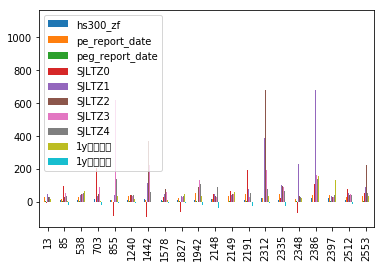

In [37]:
# fig = plt.figure()
# fig.set_size_inches(18.5, 10.5)
#ax = fig.add_subplot(111)
#ax.hist(df[df.SECUCODE=='603288'][['SJLTZ'+str(i) for i in range(5)]], bins=7)
df.plot(kind='bar')
# df[['SJLTZ'+str(i) for i in range(5)]].plot(kind='bar')
# fig.show()
# fig.savefig('test2png.png', dpi=100)

In [14]:
test2014 = ms.MyStock(2014)
test2014.watch()

D:\zzz\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\zzz\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [3]:
test2014.stockGDF.head()

,SECUCODE,SECUNAME0,EPSJB0,EPSKCJB0,YS0,YSTZ0,YSHZ0,SJL0,SJLTZ0,SJLHZ0,...,SJLTZ,pe_report_date,eps_ondate,peg_report_date,price_report_date,1y最大涨幅,1y最大跌幅,hs300_zf,pe,peg
21,300567,精测电子,-,-,8743162.5,-,-,4065668.47,NaN,-,...,100.305834,0.00,0.83,0.00,28.560,362.68,0.00,21.56,70.00,0.70
28,002701,奥瑞金,0.0,-,1299462939.0,3.64609418,-,120510877.0,24.749129,-,...,51.533277,17.47,1.0,0.34,8.121,60.15,-0.78,39.20,15.71,0.30
35,002700,新疆浩源,0.0,-,63042292.43,-,-,18087880.13,NaN,-,...,26.981144,56.48,0.35,2.09,15.237,39.71,-37.26,35.87,58.84,2.18
54,300349,金卡智能,1.58,1.02,98975164.01,-,-,16288248.87,NaN,-,...,44.597717,68.27,0.65,1.53,35.794,66.19,-35.96,34.79,39.20,0.88
57,300347,泰格医药,0.23,0.23,62792911.79,-,-,7801022.36,NaN,-,...,38.831884,90.28,0.44,2.32,40.665,41.15,-44.07,21.10,84.63,2.18


In [10]:
test2014.stockGDF.head()

,SECUCODE,SECUNAME0,EPSJB0,EPSKCJB0,YS0,YSTZ0,YSHZ0,SJL0,SJLTZ0,SJLHZ0,...,eps_ondate,peg_report_date,price_report_date,1y最大涨幅,1y最大跌幅,hs300_zf,pe,peg,peg_max,peg_min
21,300567,精测电子,-,-,8743162.5,-,-,4065668.47,NaN,-,...,0.83,0.34,28.560,362.68,0.00,21.56,70.00,0.70,1.59,0.34
28,002701,奥瑞金,0.0,-,1299462939.0,3.64609418,-,120510877.0,24.749129,-,...,1.00,0.16,8.121,60.15,-0.78,39.20,15.71,0.30,0.25,0.16
35,002700,新疆浩源,0.0,-,63042292.43,-,-,18087880.13,NaN,-,...,0.35,1.61,15.237,39.71,-37.26,35.87,58.84,2.18,2.25,1.01
54,300349,金卡智能,1.58,1.02,98975164.01,-,-,16288248.87,NaN,-,...,0.65,1.23,35.794,66.19,-35.96,34.79,39.20,0.88,2.05,0.79
57,300347,泰格医药,0.23,0.23,62792911.79,-,-,7801022.36,NaN,-,...,0.44,2.38,40.665,41.15,-44.07,21.10,84.63,2.18,3.36,1.33


In [17]:
test2014.stockGDF.head()

,SECUCODE,SECUNAME0,EPSJB0,EPSKCJB0,YS0,YSTZ0,YSHZ0,SJL0,SJLTZ0,SJLHZ0,...,SJLTZ,pe_report_date,eps_ondate,peg_report_date,price_report_date,1y最大涨幅,1y最大跌幅,hs300_zf,pe,peg
21,300567,精测电子,-,-,8743162.5,-,-,4065668.47,NaN,-,...,100.305834,0.00,0.83,0.00,28.560,362.68,0.00,21.56,70.00,0.70
28,002701,奥瑞金,0.0,-,1299462939.0,3.64609418,-,120510877.0,24.749129,-,...,51.533277,17.47,1.0,0.34,8.121,60.15,-0.78,39.20,15.71,0.30
35,002700,新疆浩源,0.0,-,63042292.43,-,-,18087880.13,NaN,-,...,26.981144,56.48,0.35,2.09,15.237,39.71,-37.26,35.87,58.84,2.18
54,300349,金卡智能,1.58,1.02,98975164.01,-,-,16288248.87,NaN,-,...,44.597717,68.27,0.65,1.53,35.794,66.19,-35.96,34.79,39.20,0.88
57,300347,泰格医药,0.23,0.23,62792911.79,-,-,7801022.36,NaN,-,...,38.831884,90.28,0.44,2.32,40.665,41.15,-44.07,21.10,84.63,2.18


In [6]:
test2014.stockGDF.loc[:, ('eps_ondate')] = test2014.stockGDF['eps_ondate'].astype(float)
test2014.stockGDF.loc[:, ('peg_max')] = \
                        test2014.stockGDF.apply(lambda x: round(test2014.price_df_1y(x['rec_report_date'], x['SECUCODE']).max()['close'] \
                                                 / x['eps_ondate'] / x['SJLTZ'], 2), axis=1)
test2014.stockGDF.loc[:, ('peg_min')] = \
                        test2014.stockGDF.apply(lambda x: round(test2014.price_df_1y(x['rec_report_date'], x['SECUCODE']).min()['close'] \
                                                 / x['eps_ondate'] / x['SJLTZ'], 2), axis=1)

In [9]:
test2014.stockGDF.loc[:,('peg_report_date')] \
                        = test2014.stockGDF.apply(lambda x: round(test2014.price_after_report_1y(x['rec_report_date'], x['SECUCODE'], 0)\
                                                 / x['eps_ondate'] / x['SJLTZ'], 2), axis=1)

In [15]:
df = test2014.stockGDF[['SECUCODE','SECUNAME2',  'hs300_zf', 'pe_report_date', 'peg_report_date'] + ['SJLTZ'+str(i) for i in range(5)]\
                 + ['1y最大涨幅', '1y最大跌幅']][(test2014.stockGDF.peg_report_date > 0) & (test2014.stockGDF.peg_report_date<1)]
df['std'] = np.std(df[['SJLTZ'+str(i) for i in range(5)]], axis=1)

In [12]:
df.describe()

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅,1y最大跌幅,std
count,49.000000,49.000000,49.000000,45.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,29.671020,59.375510,0.532245,35.817073,80.827715,66.363937,72.177136,44.882360,64.010408,-33.537143,38.588246
std,13.681646,85.377312,0.246054,148.814378,44.785903,92.313068,153.485652,23.235733,53.859545,18.274957,93.720565
min,11.360000,0.000000,0.130000,-883.781215,27.153696,25.431286,25.532560,26.167687,12.560000,-62.180000,1.637547
25%,18.400000,22.880000,0.340000,28.556536,46.730850,35.459359,34.704436,30.434922,34.170000,-46.990000,10.833840
50%,32.150000,36.260000,0.540000,45.414021,67.564982,45.213594,43.997315,40.684259,51.060000,-35.640000,21.339045
75%,37.540000,52.370000,0.730000,70.247942,104.682763,71.211187,53.006359,47.468763,79.410000,-20.890000,36.950882
max,52.620000,500.430000,0.990000,263.768891,208.134450,680.010705,1103.884496,158.857079,362.680000,0.000000,667.445995


In [13]:
df[(df['std']<20) & (df['peg_report_date'] > 0.3)].describe()

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅,1y最大跌幅,std
count,20.000000,20.000000,20.000000,18.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,26.708500,63.973500,0.622500,48.234693,50.830981,47.990002,45.071142,41.406789,70.200000,-30.232500,10.855374
std,15.641395,108.212485,0.200994,17.452331,14.458371,18.635793,18.973850,19.640688,73.506781,17.531381,4.675608
min,11.360000,0.000000,0.320000,24.127067,30.937815,29.516569,25.532560,26.167687,23.710000,-60.930000,1.637547
25%,12.900000,25.065000,0.457500,34.659139,39.544447,35.044759,33.286333,29.494988,31.732500,-40.067500,8.238836
50%,20.090000,34.830000,0.660000,47.171924,47.900460,40.383773,41.257316,36.070926,45.550000,-31.435000,10.100990
75%,44.040000,42.850000,0.775000,57.052447,60.625041,52.555418,44.920794,43.601604,82.327500,-17.210000,14.083153
max,51.990000,500.430000,0.950000,81.589805,82.856377,94.676333,105.931147,100.305834,362.680000,0.000000,18.365172


The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.


In [18]:
df.describe()

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅,1y最大跌幅,std
count,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,30.427600,27.04440,0.611600,24.629233,76.897933,77.337898,95.088602,48.165757,53.982800,-30.067600,51.584346
std,13.437141,10.51907,0.226599,205.395678,45.373714,127.604701,213.573845,26.476504,24.864533,18.144183,131.656271
min,11.360000,10.10000,0.230000,-883.781215,27.153696,26.861601,27.651527,25.168759,12.560000,-62.180000,4.799285
25%,18.400000,18.58000,0.400000,28.556536,42.674085,35.459359,39.674870,36.452929,30.050000,-42.190000,10.098475
50%,34.790000,27.07000,0.620000,45.414021,64.170702,45.254768,43.397712,43.508016,51.510000,-27.480000,15.038589
75%,39.200000,35.03000,0.750000,60.104811,96.168767,67.177622,50.376353,50.411922,75.540000,-18.070000,26.352225
max,51.990000,52.37000,0.990000,428.723811,201.178463,680.010705,1103.884496,158.857079,90.310000,-0.780000,667.445995


In [16]:
df[(df['std']<20) & (df['peg_report_date'] > 0.3)].describe()

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅,1y最大跌幅,std
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,29.258462,25.595385,0.700000,48.688410,49.550759,44.004404,40.348815,36.557713,57.834615,-25.770000,10.433225
std,14.346199,8.970798,0.202196,17.197153,13.377141,9.986860,6.259534,6.926805,25.099230,13.837216,3.444840
min,11.360000,12.780000,0.360000,28.556536,30.937815,30.743872,29.203849,25.168759,23.710000,-54.030000,4.799285
25%,18.400000,18.580000,0.610000,30.907398,40.453262,39.193124,39.259047,30.434922,31.560000,-35.640000,8.794798
50%,23.230000,26.550000,0.690000,51.082924,42.952556,40.806892,42.583639,36.705461,66.450000,-25.920000,10.098475
75%,42.500000,34.020000,0.780000,59.789889,60.857308,50.015989,43.397712,43.508016,78.070000,-18.070000,13.245354
max,49.010000,39.060000,0.990000,79.470762,74.254073,67.177622,50.235404,46.663303,90.000000,-5.330000,15.038589


In [78]:
df[(df['std']<30) & (df['peg_report_date'] > 0.3)].describe()

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅,1y最大跌幅,std
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,12.618889,32.226667,0.750000,52.875865,48.402335,47.592101,47.024937,43.297895,36.458889,-8.935556,16.139336
std,5.097250,8.664743,0.140535,35.880895,20.441222,23.231151,17.632070,10.596722,40.698430,9.015627,9.802721
min,8.830000,17.470000,0.550000,-6.567186,32.900252,26.356196,26.062601,30.120222,2.040000,-25.700000,3.407297
25%,9.420000,26.550000,0.690000,27.153696,39.193124,29.695921,36.452929,37.206343,11.850000,-12.280000,8.702286
50%,10.780000,33.810000,0.710000,49.070070,44.742251,42.878296,43.511025,41.817493,17.210000,-8.150000,16.341582
75%,11.910000,35.030000,0.880000,74.254073,46.149056,44.284566,51.533277,48.950641,60.220000,-2.610000,25.334740
max,23.890000,48.420000,0.940000,104.979034,100.540733,94.639287,86.304628,62.791276,128.000000,0.000000,29.410862


In [70]:
df[(df['std']<10) & (df['peg_report_date'] > 0.3)].sort_values(by='1y最大跌幅')

,SECUCODE,SECUNAME2,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅,1y最大跌幅,std
2148,601000,唐山港,18.62,14.86,0.40,59.789889,35.967851,34.165189,39.930993,37.460567,23.71,-54.03,9.356239
556,002325,洪涛股份,12.90,36.26,0.99,37.730864,40.453262,40.306454,50.235404,36.705461,72.35,-39.75,4.799285
1696,000538,云南白药,12.90,28.98,0.62,29.714959,53.410397,30.743872,30.688291,46.663303,26.73,-20.89,9.869037
1975,002415,海康威视,49.01,30.03,0.69,28.556536,49.070070,40.806892,44.284566,43.511025,89.01,-12.54,6.881782
1285,002508,老板电器,23.23,34.02,0.78,51.082924,64.170702,39.193124,43.340850,43.873342,40.04,-5.41,8.794798
1462,000826,启迪桑德,44.47,35.03,0.96,30.907398,42.043779,45.374804,42.878296,36.452929,90.00,-5.33,5.205949


In [3]:
test2013 = ms.MyStock(2013)
test2013.watch()

D:\zzz\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\zzz\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
test2015 = ms.MyStock(2015)
test2015.watch()

D:\zzz\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\zzz\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
self = ms.MyStock(2015)

In [5]:
test2013.stockGDF[['SECUCODE','SECUNAME2', 'hs300_zf', 'pe_report_date', 'peg_report_date'] + ['SJLTZ'+str(i) for i in range(5)]\
                 + ['1y最大涨幅']][(test2013.stockGDF.peg_report_date > 0) & (test2013.stockGDF.peg_report_date<1)]

,SECUCODE,SECUNAME2,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅
46,300315,掌趣科技,118.69,31.98,0.67,NaN,428.723811,201.178463,34.721039,47.791164,103.95
131,300298,三诺生物,72.80,42.58,0.92,NaN,263.768891,110.396175,60.706064,46.125419,12.57
177,601633,长城汽车,78.84,10.10,0.15,-45.622087,95.158656,169.169556,26.861601,66.144915,57.25
219,300251,光线传媒,83.00,38.04,0.50,NaN,386.817103,79.901635,55.817479,76.465258,63.91
284,601566,九牧王,106.62,18.21,0.63,NaN,33.394322,39.787889,43.729366,29.065863,77.06
323,300204,舒泰神,72.80,39.52,0.74,336.614424,115.324749,62.595490,81.322702,53.694263,46.93
371,300182,捷成股份,106.62,39.06,0.99,121.433131,79.470762,60.857308,54.065863,39.259047,85.82
449,300146,汤臣倍健,67.23,27.07,0.54,120.220950,95.365516,76.541482,102.413928,50.376353,3.79
468,002509,天广中茂,9.25,70.53,0.53,54.413930,49.102119,27.654600,42.855159,132.400404,18.10
469,002508,老板电器,91.07,34.02,0.78,-10.094810,51.082924,64.170702,39.193124,43.340850,82.99


In [112]:
df3 = test2013.stockGDF[['SECUCODE','SECUNAME2', 'hs300_zf', 'pe_report_date', 'peg_report_date'] + ['SJLTZ'+str(i) for i in range(5)]\
                 + ['1y最大涨幅']][(test2013.stockGDF.peg_report_date > 0) & (test2013.stockGDF.peg_report_date<1)]

In [4]:
df4 = test2014.stockGDF[['SECUCODE','SECUNAME2', 'hs300_zf', 'pe_report_date', 'peg_report_date'] + ['SJLTZ'+str(i) for i in range(5)]\
                 + ['1y最大涨幅']][(test2014.stockGDF.peg_report_date > 0) & (test2014.stockGDF.peg_report_date<1)]
#                 + ['1y最大涨幅']][(test2014.stockGDF.peg_report_date > 0) ]                        

In [21]:
df5 = test2015.stockGDF[['SECUCODE','SECUNAME2', 'hs300_zf', 'pe_report_date', 'peg_report_date'] + ['SJLTZ'+str(i) for i in range(5)]\
                 + ['1y最大涨幅']][(test2015.stockGDF.peg_report_date > 0) & (test2015.stockGDF.peg_report_date<1)]
#                 + ['1y最大涨幅']][(test2014.stockGDF.peg_report_date > 0) ]                        

['SECUCODE' 'SECUNAME0' 'EPSJB0' 'EPSKCJB0' 'YS0' 'YSTZ0' 'YSHZ0' 'SJL0'
 'SJLTZ0' 'SJLHZ0' 'BPS0' 'ROEPJ0' 'MGXJJE0' 'XSMLL0' 'LRFP0' 'GXL0'
 'NOTICEDATE0' 'REPORTDATE0' 'TYPE0' 'COMPANYCODE0' 'Unnamed: 01'
 'SECUNAME1' 'EPSJB1' 'EPSKCJB1' 'YS1' 'YSTZ1' 'YSHZ1' 'SJL1' 'SJLTZ1'
 'SJLHZ1' 'BPS1' 'ROEPJ1' 'MGXJJE1' 'XSMLL1' 'LRFP1' 'GXL1' 'NOTICEDATE1'
 'REPORTDATE1' 'TYPE1' 'COMPANYCODE1' 'SECUNAME2' 'EPSJB2' 'EPSKCJB2'
 'YS2' 'YSTZ2' 'YSHZ2' 'SJL2' 'SJLTZ2' 'SJLHZ2' 'BPS2' 'ROEPJ2' 'MGXJJE2'
 'XSMLL2' 'LRFP2' 'GXL2' 'NOTICEDATE2' 'REPORTDATE2' 'TYPE2'
 'COMPANYCODE2' 'SECUNAME3' 'EPSJB3' 'EPSKCJB3' 'YS3' 'YSTZ3' 'YSHZ3'
 'SJL3' 'SJLTZ3' 'SJLHZ3' 'BPS3' 'ROEPJ3' 'MGXJJE3' 'XSMLL3' 'LRFP3'
 'GXL3' 'NOTICEDATE3' 'REPORTDATE3' 'TYPE3' 'COMPANYCODE3' 'SECUNAME4'
 'EPSJB4' 'EPSKCJB4' 'YS4' 'YSTZ4' 'YSHZ4' 'SJL4' 'SJLTZ4' 'SJLHZ4' 'BPS4'
 'ROEPJ4' 'MGXJJE4' 'XSMLL4' 'LRFP4' 'GXL4' 'NOTICEDATE4' 'REPORTDATE4'
 'TYPE4' 'COMPANYCODE4' 'rec_report_date' 'SJLTZ' 'pe_report_date'
 'eps_ondate' 'peg

In [22]:
test2014.stockGDF[['SECUCODE','SECUNAME2', 'hs300_zf', 'pe_report_date', 'peg_report_date', 'rec_report_date'] + ['SJLTZ'+str(i) for i in range(5)]\
                 + ['1y最大涨幅']][(test2014.stockGDF.peg_report_date > 0) & (test2014.stockGDF.peg_report_date<1)]

,SECUCODE,SECUNAME2,hs300_zf,pe_report_date,peg_report_date,rec_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅
28,002701,奥瑞金,39.20,17.47,0.34,2015-03-18,24.749129,96.168767,34.165558,27.651527,51.533277,60.15
168,300315,掌趣科技,18.40,31.98,0.37,2015-04-18,428.723811,201.178463,34.721039,47.791164,86.657787,37.84
342,601633,长城汽车,34.79,10.10,0.23,2015-03-21,95.158656,169.169556,26.861601,66.144915,44.465914,12.56
461,601888,中国国旅,18.40,15.82,0.55,2015-04-18,41.371652,30.937815,67.177622,46.829479,28.733621,31.56
556,002325,洪涛股份,12.90,36.26,0.99,2015-04-28,37.730864,40.453262,40.306454,50.235404,36.705461,72.35
580,000413,东旭光电,51.99,41.02,0.26,2015-02-17,-883.781215,104.682763,680.010705,1103.884496,158.857079,82.04
634,002344,海宁皮城,34.80,19.73,0.42,2015-03-27,15.043387,157.678145,110.071947,33.687681,47.468763,26.01
698,002236,大华股份,37.54,52.37,0.85,2015-03-20,12.542556,122.118937,45.213594,85.234499,61.524474,41.84
880,600518,康美药业,23.23,20.16,0.66,2015-04-10,70.247942,42.674085,40.461092,43.397712,30.434922,27.92
1003,300146,汤臣倍健,48.66,27.07,0.54,2015-02-28,95.365516,76.541482,102.413928,50.376353,50.411922,69.35


In [16]:
df1[df1['1y最大涨幅'] > df1['hs300_zf']*2]

,SECUCODE,SECUNAME2,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅
168,300315,掌趣科技,18.40,31.98,0.37,428.723811,201.178463,34.721039,47.791164,86.657787,37.84
556,002325,洪涛股份,12.90,36.26,0.99,37.730864,40.453262,40.306454,50.235404,36.705461,72.35
1462,000826,启迪桑德,44.47,35.03,0.96,30.907398,42.043779,45.374804,42.878296,36.452929,90.00
1483,300039,上海凯宝,35.54,22.88,0.72,19.103502,80.140396,35.459359,44.537596,31.637492,90.31
1560,300182,捷成股份,11.36,39.06,0.99,79.470762,60.857308,54.065863,39.259047,39.572891,79.41
1696,000538,云南白药,12.90,28.98,0.62,29.714959,53.410397,30.743872,30.688291,46.663303,26.73
1719,002375,亚厦股份,12.14,35.79,0.87,54.694428,98.218120,71.211187,41.315138,41.005888,51.51
1872,002450,康得新,22.22,36.19,0.65,60.104811,51.510131,86.563197,223.486445,55.697572,71.99
2408,300043,星辉娱乐,37.54,18.58,0.74,53.901039,42.952556,45.254768,32.227593,25.168759,78.07


In [113]:
df3[df3['1y最大涨幅'] > df3['hs300_zf']*2]

,SECUCODE,SECUNAME2,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅
475,002503,搜于特,115.76,55.70,0.97,150.745541,78.623040,67.959202,90.730651,57.540115,261.48
607,601000,唐山港,90.48,14.86,0.37,20.367307,59.789889,35.967851,34.165189,39.930993,207.39
1511,600637,东方明珠,5.98,45.21,0.99,-6392.542330,103.599536,199.763221,37.725481,45.442723,213.86
2079,002081,金螳螂,91.50,14.96,0.29,53.015842,45.414021,93.727987,88.549036,51.672019,209.42


In [ ]:
df2 = test2015.stockGDF[['SECUCODE','SECUNAME2', 'hs300_zf', 'pe_report_date', 'peg_report_date'] + ['SJLTZ'+str(i) for i in range(5)]\
                 + ['1y最大涨幅']][(test2015.stockGDF.peg_report_date > 0) & (test2015.stockGDF.peg_report_date<1)]
#                 + ['1y最大涨幅']][(test2014.stockGDF.peg_report_date > 0) ]                        
df2[df2['1y最大涨幅'] > df2['hs300_zf']*2].describe()

In [ ]:
df3 = test2013.stockGDF[['SECUCODE','SECUNAME2', 'hs300_zf', 'pe_report_date', 'peg_report_date'] + ['SJLTZ'+str(i) for i in range(5)]\
                 + ['1y最大涨幅']][(test2013.stockGDF.peg_report_date > 0) & (test2013.stockGDF.peg_report_date<1)]
#                 + ['1y最大涨幅']][(test2014.stockGDF.peg_report_date > 0) ]                        
df3[df3['1y最大涨幅'] > df3['hs300_zf']*2].describe()

In [4]:
test2015.stockGDF[['SECUCODE','SECUNAME2', '1y最大涨幅', 'hs300_zf', 'pe_report_date', 'eps_ondate', 'SJLTZ', 'price_now', 'rec_report_date', 'price_report_date'] + ['SJLTZ'+str(i) for i in range(5)]]\
    [test2015.stockGDF.peg_report_date > 0]

,SECUCODE,SECUNAME2,1y最大涨幅,hs300_zf,pe_report_date,eps_ondate,SJLTZ,price_now,rec_report_date,price_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4
13,603288,海天味业,17.21,18.32,26.44,0.78,30.120222,56.22,2016-03-10,27.350,-6.567186,44.742251,26.356196,33.029388,30.120222
44,300367,东方网力,42.72,20.90,152.50,0.466,33.298634,16.81,2016-02-03,23.426,57.969610,51.638829,43.997315,30.251820,33.298634
60,300357,我武生物,17.63,11.91,52.01,0.62,41.083651,50.55,2016-04-08,35.185,75.074099,102.461010,44.302060,31.224474,41.083651
85,002701,奥瑞金,4.51,10.78,17.47,0.82,31.528854,5.77,2016-03-31,9.980,96.168767,34.165558,27.651527,51.533277,31.528854
93,002700,新疆浩源,10.01,11.48,56.48,0.25,27.553657,9.75,2016-03-25,15.806,68.010560,59.857672,33.357452,26.981144,27.553657
114,300347,泰格医药,20.49,10.43,90.28,0.29,33.426462,41.85,2016-04-16,28.863,306.475861,50.718567,41.757723,38.831884,33.426462
140,300386,飞天诚信,84.37,10.84,364.64,1.41,31.411282,15.50,2016-03-30,19.964,120.265994,52.380585,75.427357,94.666786,31.411282
358,002065,东华软件,12.69,12.14,46.33,0.7013,34.737809,8.50,2016-04-26,11.136,31.662881,32.653527,35.210407,35.436391,34.737809
411,600587,新华医疗,0.46,10.43,57.53,0.82,40.901700,14.41,2016-04-16,26.077,46.178188,77.719094,52.260669,41.864388,40.901700
440,002589,瑞康医药,39.25,12.07,51.91,0.42,26.074940,14.30,2016-04-20,12.776,38.768811,35.337949,31.637955,29.736240,26.074940


In [7]:
test2015.stockGDF[[ 'hs300_zf', 'pe_report_date', 'peg_report_date'] + ['SJLTZ'+str(i) for i in range(5)]\
                 + ['1y最大涨幅']][(test2015.stockGDF.peg_report_date > 0) & (test2015.stockGDF.peg_report_date<1)]

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅
13,18.32,26.44,0.88,-6.567186,44.742251,26.356196,33.029388,30.120222,17.21
85,10.78,17.47,0.55,96.168767,34.165558,27.651527,51.533277,31.528854,4.51
538,10.37,30.03,0.58,49.070070,40.806892,44.284566,43.511025,52.132487,61.16
703,12.80,31.98,0.28,201.178463,34.721039,47.791164,86.657787,115.201936,5.54
855,10.37,6.51,0.05,-85.416097,38.740086,591.934670,618.048487,138.566523,30.80
1240,9.21,35.03,0.94,42.043779,45.374804,42.878296,36.452929,37.284828,15.59
1442,14.11,7.51,0.14,-91.421104,114.583034,368.697535,223.556563,55.484798,17.63
1578,9.42,33.81,0.71,27.153696,46.149056,76.898624,58.949229,47.848912,11.85
1827,10.84,19.73,0.59,-65.428978,34.962352,34.171775,29.614197,33.509564,45.96
1942,10.52,50.84,0.49,-1.484881,42.971722,89.588022,128.551029,103.996514,35.26


In [76]:
df = test2015.stockGDF[[ 'hs300_zf', 'pe_report_date', 'peg_report_date'] + ['SJLTZ'+str(i) for i in range(5)]\
                 + ['1y最大涨幅']][(test2015.stockGDF.peg_report_date > 0) & (test2015.stockGDF.peg_report_date<1)]
#                + ['1y最大涨幅']][(test2015.stockGDF.peg_report_date > 0)]

In [77]:
df['hs300_zf'] = df['hs300_zf']/100
df['SJLTZ0'] = df['SJLTZ0']/100
df['SJLTZ1'] = df['SJLTZ1']/100
df['SJLTZ2'] = df['SJLTZ2']/100
df['SJLTZ3'] = df['SJLTZ3']/100
df['SJLTZ4'] = df['SJLTZ4']/100
df['1y最大涨幅'] = df['1y最大涨幅']/100

In [86]:
df2017 = test2017.stockGDF[[ 'hs300_zf', 'pe_report_date', 'peg_report_date'] + ['SJLTZ'+str(i) for i in range(5)]\
                 + ['1y最大涨幅']][(test2017.stockGDF.peg_report_date > 0) & (test2017.stockGDF.peg_report_date<1)]
#                + ['1y最大涨幅']][(test2017.stockGDF.peg_report_date > 0)]

In [88]:
df2017['hs300_zf'] = df2017['hs300_zf']/100
df2017['SJLTZ0'] = df2017['SJLTZ0']/100
df2017['SJLTZ1'] = df2017['SJLTZ1']/100
df2017['SJLTZ2'] = df2017['SJLTZ2']/100
df2017['SJLTZ3'] = df2017['SJLTZ3']/100
df2017['SJLTZ4'] = df2017['SJLTZ4']/100
df2017['1y最大涨幅'] = df2017['1y最大涨幅']/100

In [109]:
df2017.sort_values(by=['1y最大涨幅'])

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅,p
2845,0.1063,24.18,0.02,-2.120125,1.372248,0.771434,3.135351,11.029778,0.0000,0.137483
3106,0.2758,21.42,0.40,-7.504022,1.100070,0.740157,0.947852,0.538600,0.0000,0.192387
1429,0.2678,32.00,0.13,-0.220154,0.922714,0.366569,1.187940,2.549009,0.0000,0.210295
2480,0.2637,32.67,0.11,-0.240709,0.343584,0.710576,0.457954,2.987958,0.0000,0.210064
2450,0.2622,41.23,0.25,-8.513232,1.225707,0.489926,0.842947,1.634644,0.0000,-0.033134
3150,0.2615,40.17,0.14,-0.722024,0.251482,0.636991,0.510448,2.795709,0.0000,0.152937
439,0.2529,51.75,0.47,0.993498,0.573630,0.378293,0.569240,1.093181,0.0000,0.217192
2945,0.2700,29.62,0.59,0.895880,1.285510,1.039965,0.718726,0.504059,0.0000,0.455476
1748,0.2702,45.40,0.30,0.316380,0.297362,0.260749,0.303623,1.503868,0.0000,0.184504
1794,0.2811,76.39,0.64,-0.184633,1.021845,1.954479,2.792778,1.191504,0.0013,0.236020


In [115]:
dfr.head()

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅,p
13,0.1832,26.44,0.88,-0.065672,0.447423,0.263562,0.330294,0.301202,0.1721,0.184077
85,0.1078,17.47,0.55,0.961688,0.341656,0.276515,0.515333,0.315289,0.0451,0.396445
538,0.1037,30.03,0.58,0.490701,0.408069,0.442846,0.435110,0.521325,0.6116,0.549904
703,0.1280,31.98,0.28,2.011785,0.347210,0.477912,0.866578,1.152019,0.0554,0.956247
855,0.1037,6.51,0.05,-0.854161,0.387401,5.919347,6.180485,1.385665,0.3080,1.258363


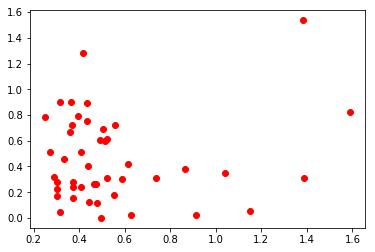

In [117]:
plt.plot(dfr['SJLTZ4'], dfr['1y最大涨幅'], 'ro')

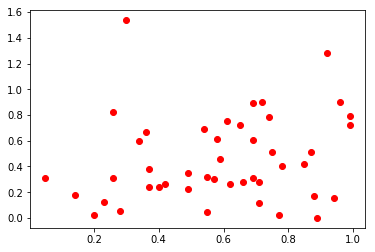

In [120]:
plt.plot(dfr['peg_report_date'], dfr['1y最大涨幅'], 'ro')

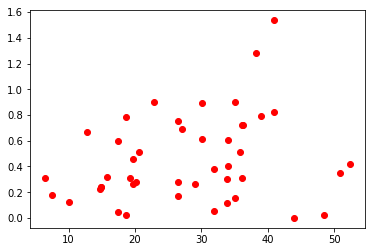

In [121]:
plt.plot(dfr['pe_report_date'], dfr['1y最大涨幅'], 'ro')

In [107]:
xx = df2017.iloc[:,:-2]
px = lr.predict(xx)

In [108]:
df2017['p'] = px

In [79]:
df1['hs300_zf'] = df1['hs300_zf']/100
df1['SJLTZ0'] = df1['SJLTZ0']/100
df1['SJLTZ1'] = df1['SJLTZ1']/100
df1['SJLTZ2'] = df1['SJLTZ2']/100
df1['SJLTZ3'] = df1['SJLTZ3']/100
df1['SJLTZ4'] = df1['SJLTZ4']/100
df1['1y最大涨幅'] = df1['1y最大涨幅']/100

In [39]:
df1.sort_values(by=['peg_report_date'])

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅
342,0.3479,10.10,0.23,0.951587,1.691696,0.268616,0.661449,0.444659,0.1256
580,0.5199,41.02,0.26,-8.837812,1.046828,6.800107,11.038845,1.588571,0.8204
28,0.3920,17.47,0.34,0.247491,0.961688,0.341656,0.276515,0.515333,0.6015
2040,0.3754,12.78,0.36,0.644304,0.675650,0.500160,0.396749,0.358027,0.6645
168,0.1840,31.98,0.37,4.287238,2.011785,0.347210,0.477912,0.866578,0.3784
2368,0.1290,14.96,0.37,0.454140,0.937280,0.885490,0.516720,0.406843,0.2407
2148,0.1862,14.86,0.40,0.597899,0.359679,0.341652,0.399310,0.374606,0.2371
634,0.3480,19.73,0.42,0.150434,1.576781,1.100719,0.336877,0.474688,0.2601
1003,0.4866,27.07,0.54,0.953655,0.765415,1.024139,0.503764,0.504119,0.6935
461,0.1840,15.82,0.55,0.413717,0.309378,0.671776,0.468295,0.287336,0.3156


In [110]:
dfr = pd.concat([df, df1])

In [71]:
dfr = dfr.dropna(axis=1,how='any') 

In [94]:
dfr = pd.concat([dfr, df2017])

In [111]:
x = dfr.iloc[:,:-2]
y = dfr.iloc[:,-2]
lr = linear_model.LinearRegression()
lr.fit(x,y)
p = lr.predict(x)

In [112]:
lr.coef_

array([-0.04434704,  0.01636854, -0.84799283,  0.05451499, -0.04685842,
        0.04908659,  0.07789484])

In [113]:
dfr['p'] = p

In [114]:
dfr.sort_values(by=['p'])

,hs300_zf,pe_report_date,peg_report_date,SJLTZ0,SJLTZ1,SJLTZ2,SJLTZ3,SJLTZ4,1y最大涨幅,p
13,0.1832,26.44,0.88,-0.065672,0.447423,0.263562,0.330294,0.301202,0.1721,0.184077
2408,0.3754,18.58,0.74,0.539010,0.429526,0.452548,0.322276,0.251688,0.7807,0.208071
2348,0.1084,14.78,0.49,-0.703314,2.254615,0.313449,0.522123,0.303011,0.2245,0.225203
2366,0.4250,20.61,0.75,0.571882,0.398030,0.327432,0.292038,0.273627,0.5106,0.225391
1483,0.3554,22.88,0.72,0.191035,0.801404,0.354594,0.445376,0.316375,0.9031,0.264688
1462,0.4447,35.03,0.96,0.309074,0.420438,0.453748,0.428783,0.364529,0.9000,0.283948
1827,0.1084,19.73,0.59,-0.654290,0.349624,0.341718,0.296142,0.335096,0.4596,0.297150
556,0.1290,36.26,0.99,0.377309,0.404533,0.403065,0.502354,0.367055,0.7235,0.300350
1240,0.0921,35.03,0.94,0.420438,0.453748,0.428783,0.364529,0.372848,0.1559,0.314824
880,0.2323,20.16,0.66,0.702479,0.426741,0.404611,0.433977,0.304349,0.2792,0.323509
